In [63]:
from google.colab import files
from IPython.display import Image
upload = files.upload()

Saving differencing2.png to differencing2.png


## Time Series Data

**Definition**: ordered sequence of values that are usually equally spaced over time

Sequence Model is data that changes over time. Could be close price of stock, or weather.

*   Seasonal:  Weather data can be seasonal, sunnier in June than January.   
*   Trend:  Stock price
*   Noise: Random Factor, makes data hard to predict

**Univariate Time Series**: only single value at each timestep

**Multivariate Time Series**: multiple values at each timestep. It can be useful of understanding the impact of related data. 

**Imputation**: project back into the pass to predict how data becomes in the future

Time series data can also predict analomy. For example,you could see website log the potential denial of service attacks 


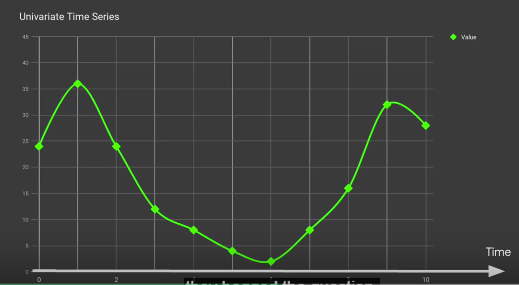

In [0]:
Image('univariate.PNG', width = 600)

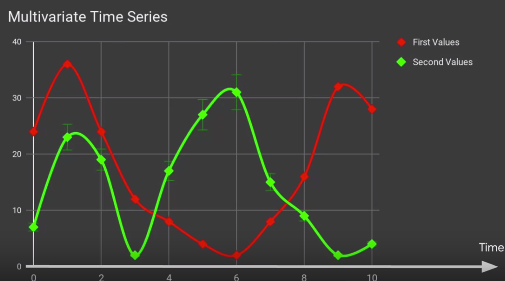

In [0]:
Image('multivariate.PNG', width = 600)

#### Time Series Application Example: 

Analyze sound wave to spot word in them which is used in neural network in speech recognitions. See how a sound wave is split into words. Using machine learning, it becomes possible to train neural network based on time series to recognize words or sub-words


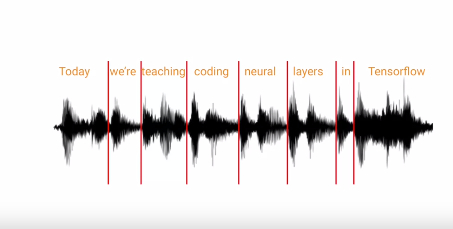

In [0]:
Image('sound_wave.PNG', width = 600)

## Common Pattern in Time Series

1.  **Trend**: Time Series have specific direction that they're moving in
2.  **Seasonality**: pattern repeated at predictable intervals. E.g. Shopping site peak on weekend or sport sites that peak at various times throughout the year. 
3.  **White Noise**: complete set of random values producing


### Autocorrelated Time Series: 
correlated with a delayed copy of iteself often called a **lag**. A time Series like this 

-  **Memory** : step dependes on previous one 
-  **Innovation**: like 下图的 spike which are **unpredictable**. They cannot predict based on past values. 


E.g. Below Picture. no trend and no seasonalities. The Spike appear random timesteps. You cannot predict when that happen and how strong it be. But, the sequences not randomly, between spike, a very deterministic type of decay. 


### Mutliple AutoCorrelation

Below picture, Mutliple AutoCorrelation at time steps from previous one and previous 50. The Lag 1 gives very short term exponential delays. And Lag 50 gives the small balance after each spike. 


### Real Life

In real time, may have each of features, trend, seasonality, autocorrelation and noise. Machine learning model to spot pattern, when spot pattern, we can make prediction. **We assume the pattern exists in the past will continue into the future.** For most part, it can apply to time series, except noise unpredictable. 

But real time series is not simple, behavior can change drastically over time. 

For example, **Non-stationary Time Series**: like below picture. For this, we could limited period of time, e.g. last 100 steps. **It breaks that more data the better result**. For time series forecasting it really depends on time series. **The optional time window you should use for training will vary**. **If it is stationary, behavior does not change over time. Then more data, better result.**. Ideally, we should take all data into account. 


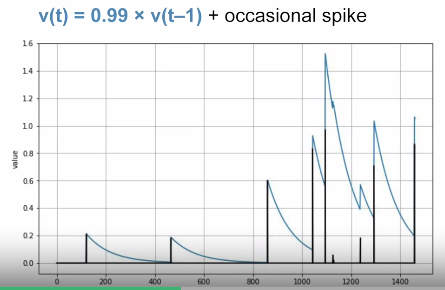

In [0]:
Image('autocorrelated.PNG', width = 400)

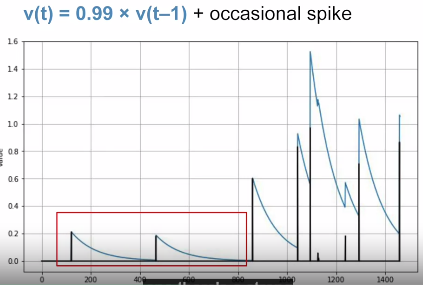

In [0]:
Image('autocorrelated (1).PNG', width = 400)

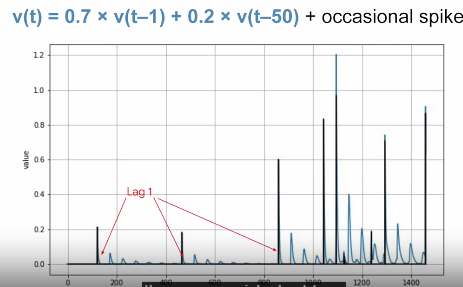

In [0]:
Image('multiple_autocorrelated.PNG', width = 500)

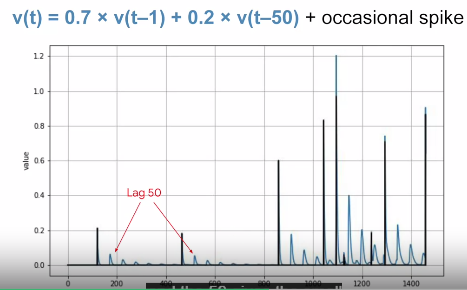

In [0]:
Image('multiple_autocorrelated1.PNG', width = 500)

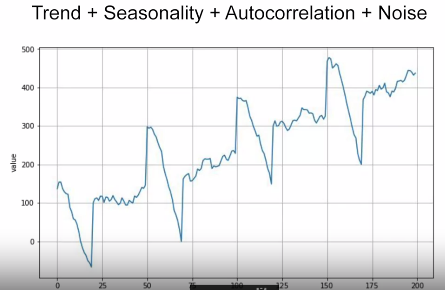

In [0]:
Image('time_series_real_life.PNG', width = 400)

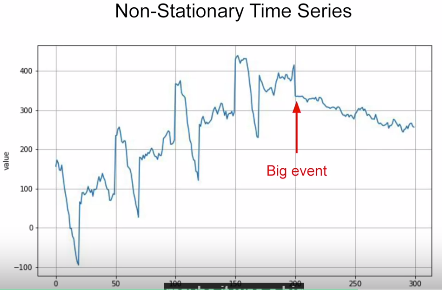

In [0]:
Image('time_series_nonstable.PNG', width = 400)

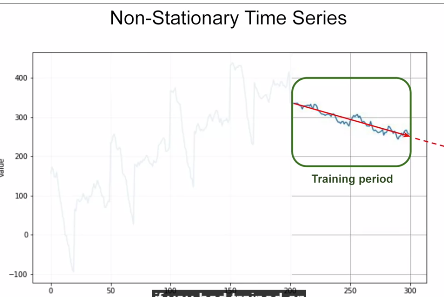

In [0]:
Image('time_series_nonstable1.PNG', width = 400)
# use last 100 steps for training may be better

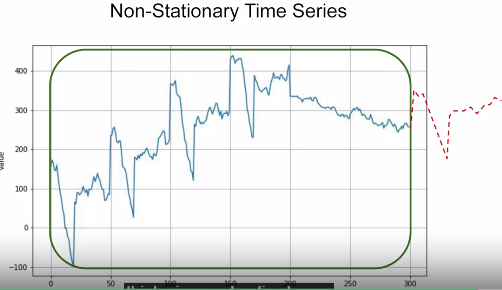

In [0]:
Image('time_series_nonstable2.PNG', width = 400)
#Ideally we shoud take all data into account

## Train, Validation and Test Sets

**Naive Forecasting**: take the last value and assume that next value will be the same one



### Train Procedure

#### Method 1 Fixed Partitioning**:

**Fixed Partitioning**: 如下图. If time series has seasonality, you want to ensure that **each period contains a whole number of seasons**.  You don't want one year and half or some months will be represented for others.

1.  **Train model on training period and evaluate it on validation period** where you can experiment to **find right architecture for training, work on it and tune its hyper parameteres until get desired performance using validation set**. 
2. After done it, can **retrain on both training and validation data, and test it on test set** to see if model performance just well. 
3. After it does, then could take unusual step of **retraining again, use all training, validation and test set**, because test data is closed data you have to the current point in time and has strongest signal to determine future values. 

It is comon that forgo test set all together, just train using training period and validation period, and test set is in the future( this course use it)


#### Method 2 Roll-forward Partitiong:


start with a short training period, then gradually increase it. Say by one day at a time or one week at a time. **At each iteration, we train model on a training period we use it to forcast the following day or following week in the validation period**


e.g. train model on first week in training set then test model on first week in validation set. Then train model on second week in training set then test it on second week in validation set, gradually roll



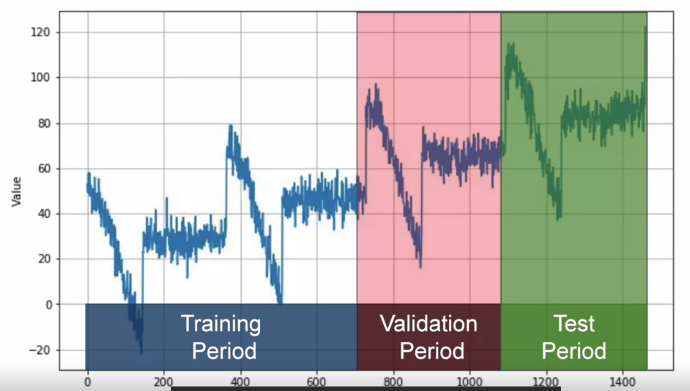

In [0]:
Image('data_split.PNG', width = 600)

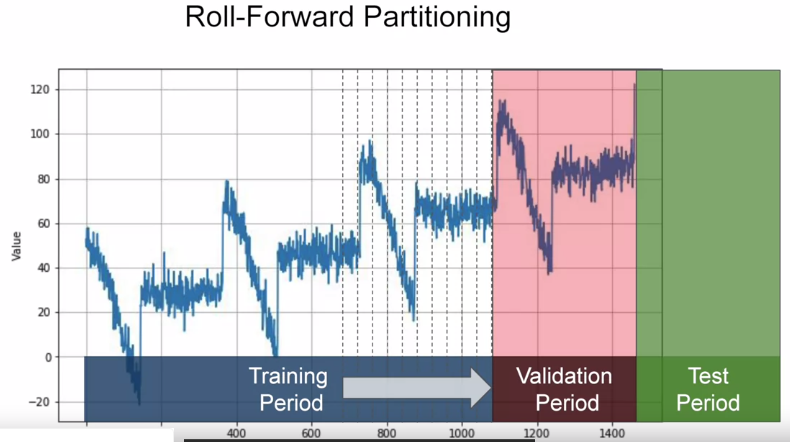

In [0]:
Image('roll_forwarding.PNG', width = 600)

## Metric for Performace 


1.   **errors = forecasts - actual**: difference from model and actual values over evalution period
2.   **mse = np.square(errors).mean()**  square to get rid of negative values
3.   **rmse = np.sqrt(mse)**: want the mean of error calculation to be the same scale as original errors
4.   **mae = np.abs(erros).means()**: mean absolute error, also called mean absolute derivation or mad, this is not penalize large errors as mush as mse does
5.   **mape = np.abs(errors / x_valid).mean()**: mean ratio between absolute error and absolute value. this gives the idea of size of errors compared to the values 

Depending on task, you may prefer MAE or MSE, for example, if **large errors are potentially dangerous and cost much more than smaller errors, prefer MSE**. But **loss is just proportional to the size of error, then MAE may be better**


Keras include MAE can be called as below




In [0]:
# MAE
keras.metrics.mean_absolute_error(x_valid, naive_forecast).numpy()

### Move Average 

A common forecasting method is called moving average. Below picture, yellow line is plot of average of blue values over a fixed period(called an **average window** e.g. 30 days). 



### Differencing

-  **Remove trend and seasonality from time series**. 
-  Instead of studing time series itself, we study **the difference between the value at time t and the value of eariler period**:
    - Depending the time of your data, the period might be a year, a day, a month ...

<br/>

Example.  $ \hat V_t $ real value, $V_t$ is predicted value
 
-   图1: $V_t = Avg( \sum_{i=0}^{30} {\hat V_{t - i}} )$, 
   -  $MAE = 7.14$ 
   -  nicely eliminate a lot of noise and give a curve roughly emulating the original. **but failed to anticipate trend or seasonality**. 
   -  Depending on the current time, the period after which you want to forecast for the future, it can actually end up being worse than naive forecast
-   图2: $V_t - V_{t-365} = Avg( \sum_{i=0}^{30} { \hat V_t - \hat V_{t - 365- i}} )$:  
   -  MA is just the forecast of difference time series, not the original time series
-   图3: $V_t  = Avg( \sum_{i=0}^{30} { \hat V_t - \hat V_{t - 365- i}} ) + \hat V_{t-365}$, 
   -  MAE on validation period, we get about 5.8. 
   - **Restoring Trend and Seasonality Forecast by using trailing windos from moving average**. 
   -  Although Moving Average removed a lot of noise but final forecasts pretty noisy. **The noisy come from the past value we added back** into forecast. 
   - Can improve these forecast also **by removing the past noise** using a move average on that(如下图4) 
-   图4: $V_t  = Avg( \sum_{i=0}^{30} { \hat V_t - \hat V_{t - 365- i}} ) + Avg( \sum_{i=0}^{10} { \hat V_{t-360}})$,
   -  Mean Square Error on validation about 4.5, give much smoother forecast.    - **Remove past noise by using centered windows from the value $365 \pm 5 $ days ago** . 
   - much better than all previous method. Sometimes, simple approaches can work just fine.
   -  But we **cannot use centered windows smoothe present value**, bc don't know future value. However smooth past values we can afford to use centered windows

 

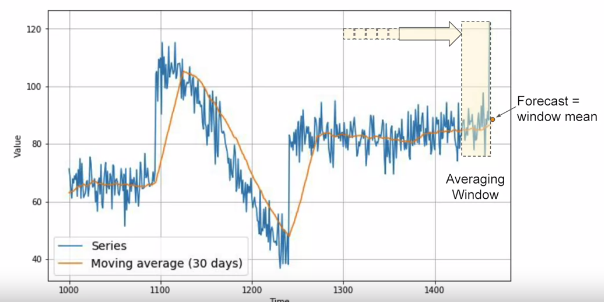

In [0]:
Image('MA.PNG', width = 600)

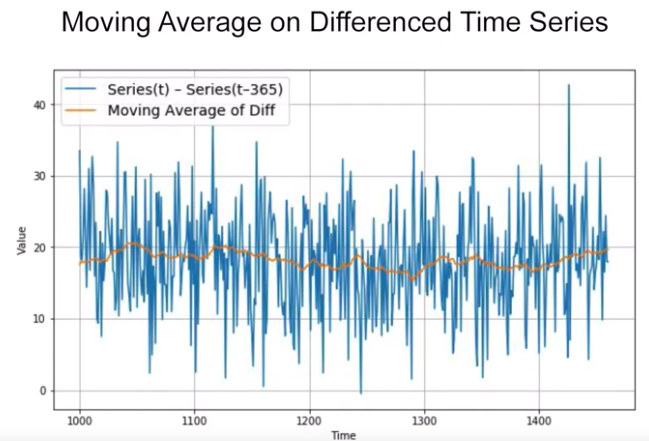

In [61]:
Image('differecing1.png', width = 600)
#Differencing study the difference T and T - 365 (one year), get data no trend and no seasonality
# MA is just the forecast of difference time series, not the original time series


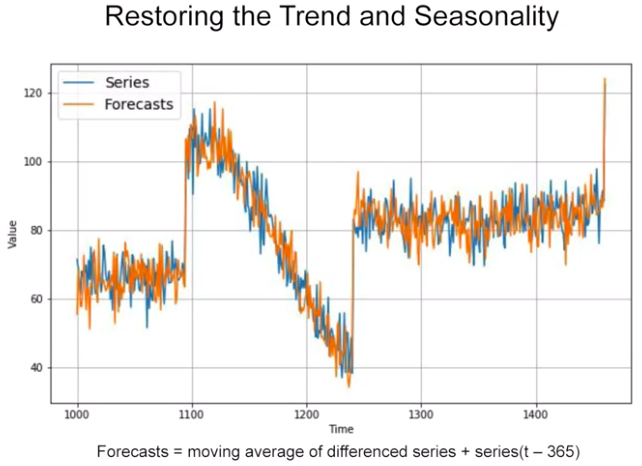

In [58]:
Image('differencing_add_back.png', width = 600)
# TO get original time series forcast, need to add back the value at time  T - 365  
# MAE on validation period, we get about 5.8

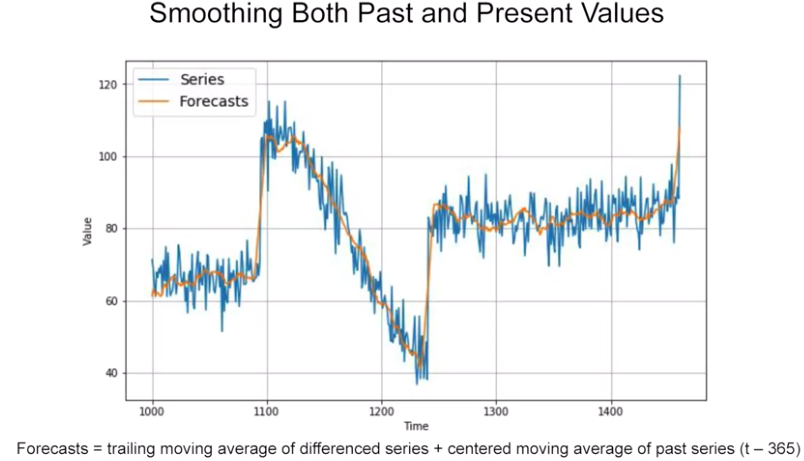

In [64]:
Image('differencing2.png', width = 600)
# Mean Square Error on validation about 4.5